## Function Transformer | Log Transform | Reciprocal Transform | Square Root Transform

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\SUNIL\AppData\Local\Temp\ipykernel_14884\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\SUNIL\AppData\Local\Temp\ipykernel_14884\2617529913.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


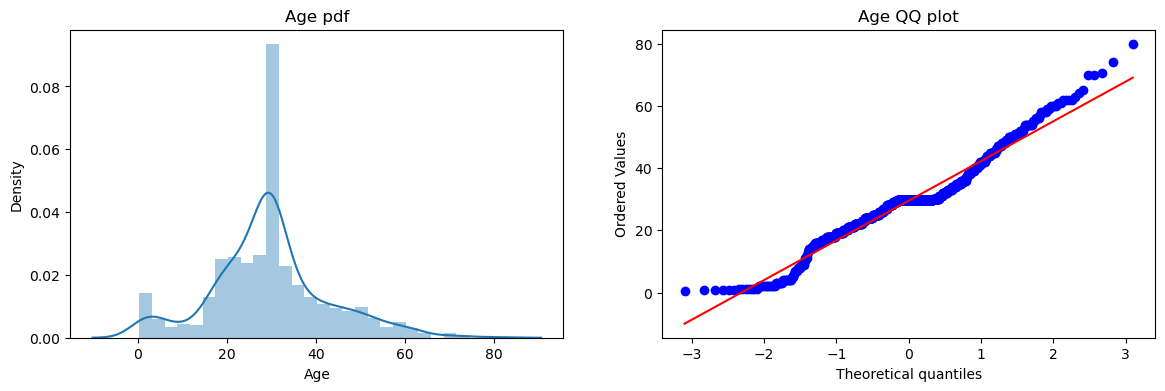

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')
plt.show()

C:\Users\SUNIL\AppData\Local\Temp\ipykernel_14884\2427053682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


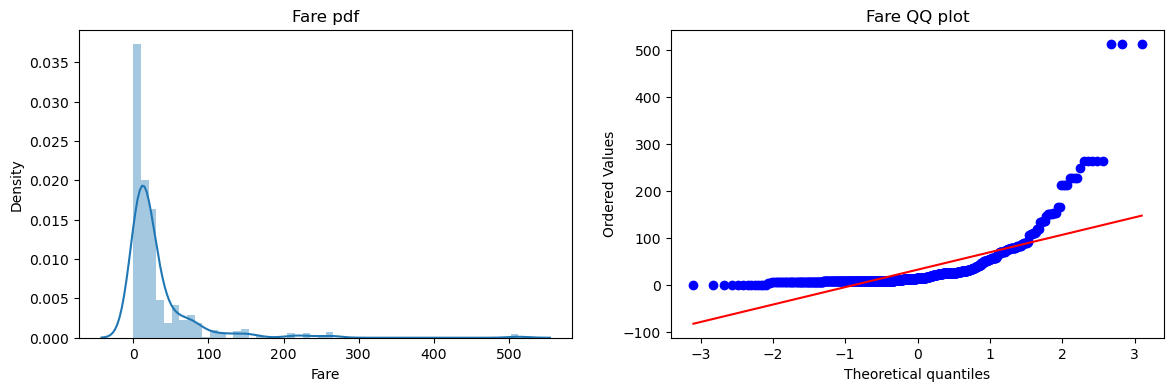

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [12]:
clf = LogisticRegression()
clf_tree = DecisionTreeClassifier()

In [37]:
clf.fit(X_train, y_train)
clf_tree.fit(X_train, y_train)

y_pred_lr = clf.predict(X_test)
y_pred_tree = clf_tree.predict(X_test)

print(f'Accuracy score of Logistic regression: {accuracy_score(y_pred_lr, y_test)}')
print(f'Accuracy score of Decision Tree: {accuracy_score(y_pred_tree, y_test)}')

Accuracy score of Logistic regression: 0.6480446927374302
Accuracy score of Decision Tree: 0.6536312849162011


In [22]:
trf = FunctionTransformer(func=np.log1p)

In [23]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [34]:
clf.fit(X_train_transformed, y_train)
clf_tree.fit(X_train_transformed, y_train)

y_pred_lr = clf.predict(X_test_transformed)
y_pred_tree = clf_tree.predict(X_test_transformed)

print('After Function Transformation:')
print(f'Accuracy score of LR: {accuracy_score(y_pred_lr, y_test)}')
print(f'Accuracy score of DT: {accuracy_score(y_pred_tree, y_test)}')

After Function Transformation:
Accuracy score of LR: 0.6815642458100558
Accuracy score of DT: 0.6703910614525139


In [39]:
print(X_transformed.shape)
print(y.shape)


(712, 2)
(891,)


In [41]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf_tree = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf_tree, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6555056179775282


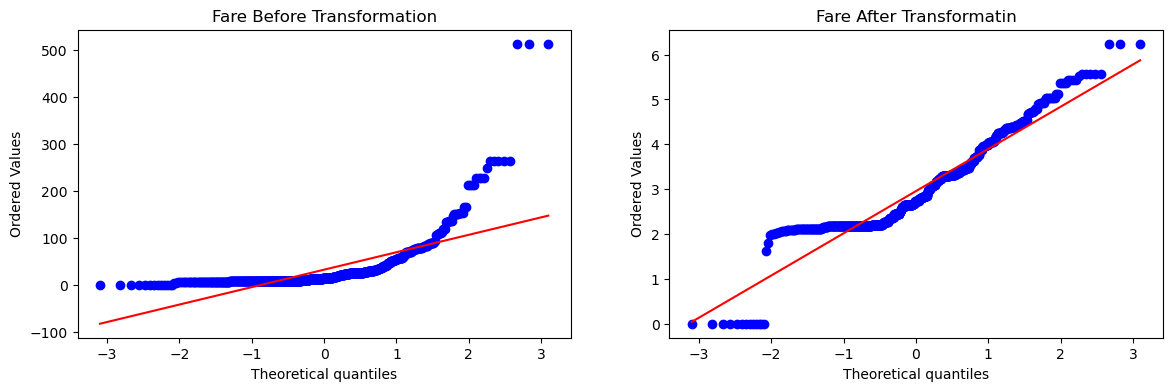

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Transformatin')
plt.show()

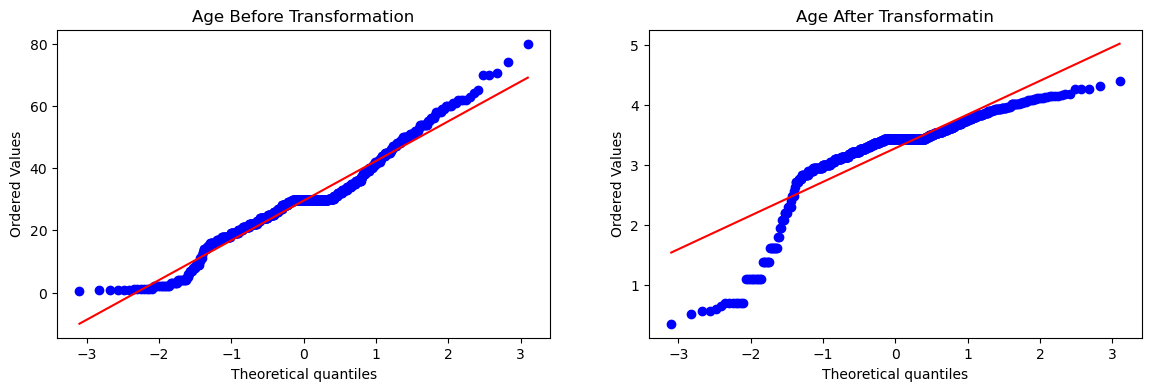

In [43]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Transformatin')
plt.show()

In [45]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(func=np.log1p), ['Fare']),
], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [46]:
clf = LogisticRegression()
clf_tree = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf_tree.fit(X_train_transformed2, y_train)

y_pred_lr = clf.predict(X_test_transformed2)
y_pred_tree = clf.predict(X_test_transformed2)

print(f'Accuracy LR: {accuracy_score(y_pred_lr, y_test)}')
print(f'Accuracy DT: {accuracy_score(y_pred_tree, y_test)}')

Accuracy LR: 0.6703910614525139
Accuracy DT: 0.6703910614525139


In [47]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf_tree = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf_tree, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6610861423220974


In [ ]:
np.where

In [75]:
def  apply_transform(transform):
    X = df.iloc[:,1:3]
    X['Fare'] = X['Fare'].replace(0, 1e-10)
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer([
        (f'{transform}', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print('Accuracy LR:', np.mean(cross_val_score(clf, X_trans, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transformation')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transformation')
    plt.show()

Accuracy LR: 0.6589013732833957


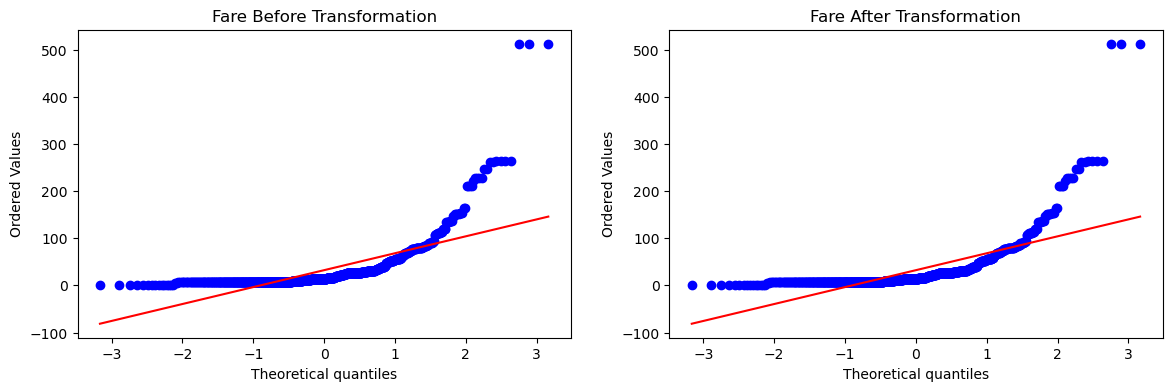

In [68]:
# Log Transformation
apply_transform(lambda x : x)

In [ ]:
np.re

Accuracy LR: 0.61729088639201


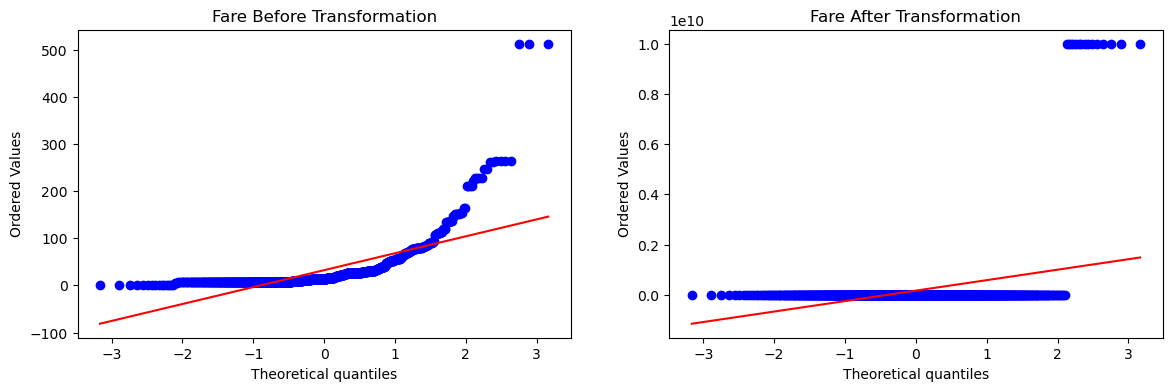

In [76]:
# reciprocal Transformation
apply_transform(lambda x : np.reciprocal(x) )

Accuracy LR: 0.6611485642946316


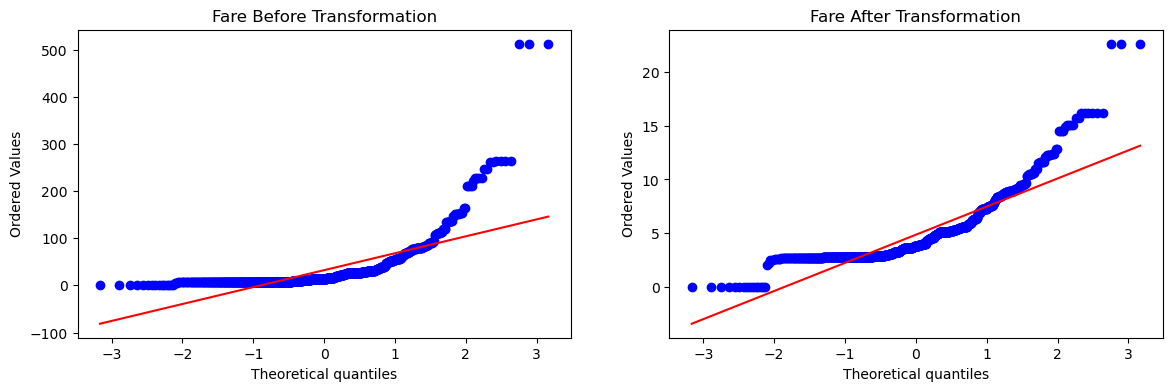

In [67]:
# Square root Transformation
apply_transform(lambda x : np.sqrt(x))

Accuracy LR: 0.6442446941323345


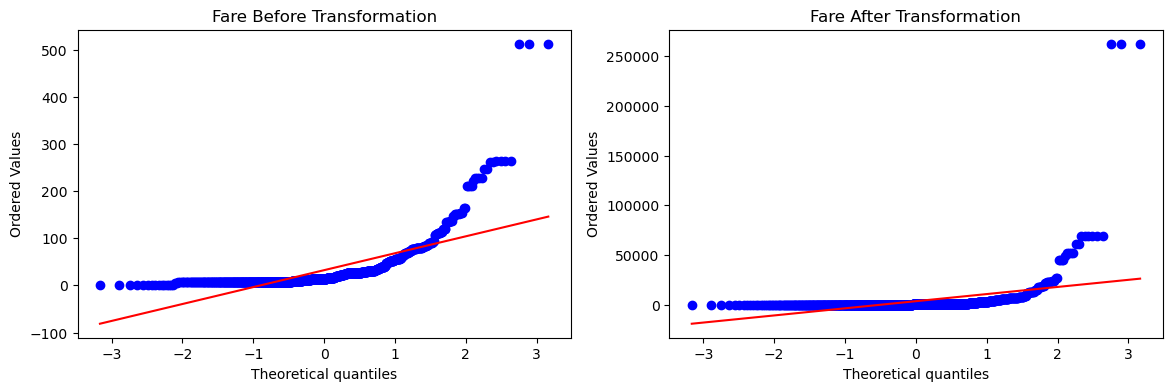

In [69]:
# Square Transformation
apply_transform(lambda x : np.square(x))

Accuracy LR: 0.6712609238451936


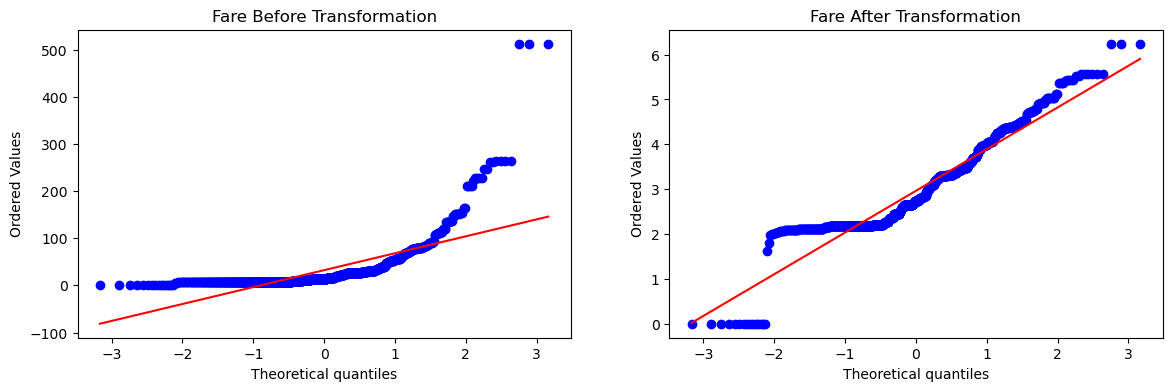

In [70]:
# Log Transformation
apply_transform(lambda x : np.log1p(x))